#Análisis de salida de la empresa Telecom X

Para continuar nuestro análisis procedemos a cargar nuestra base de datos utilizada en el challenge anterior

In [4]:
import pandas as pd

df = pd.read_csv('base.csv',index_col='Unnamed: 0')

df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_PaperlessBilling,account_Charges_Total,Cuentas_Diarias,internet_InternetService_DSL,internet_InternetService_Fiber optic,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check
0,False,False,False,True,True,9,True,False,False,True,...,True,593.30,2.186667,True,False,True,False,False,False,False
1,False,True,False,False,False,9,True,True,False,False,...,False,542.40,1.996667,True,False,False,False,False,False,False
2,True,True,False,False,False,4,True,False,False,False,...,True,280.85,2.463333,False,True,False,False,False,False,True
3,True,True,True,True,False,13,True,False,False,True,...,True,1237.85,3.266667,False,True,False,False,False,False,True
4,True,False,True,True,False,3,True,False,False,False,...,True,267.40,2.796667,False,True,False,False,False,False,False


Como nuestras variables ya se encuentran transformadas, procedemos a calcular la proporción de clientes que cancelaron

In [5]:
df['Churn'].value_counts(normalize=True).round(4)*100

,proportion
Churn,
False,71.2
True,28.8


In [6]:
df['Churn'].value_counts()

,count
Churn,
False,5174
True,2093


Si bien hay una gran tendencia hacia la no cancelación, para este ejercicio consideramos que la muestra es lo suficientemente grande para no necesitar un balanceo de la base

## Ajuste de variables

Vamos a revisar si hay variables que se pueden ajustar, sobretodo las variables cuantitativas, de tal manera que tengan una distribución normal

In [7]:
df.describe()

,customer_tenure,account_Charges_Total,Cuentas_Diarias
count,7267.000000,7256.000000,7267.000000
mean,32.346498,2280.634213,2.157337
std,24.571773,2268.632997,1.004319
min,0.000000,18.800000,0.608333
25%,9.000000,400.225000,1.180833
50%,29.000000,1391.000000,2.343333
75%,55.000000,3785.300000,2.995833
max,72.000000,8684.800000,3.958333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7267 non-null   bool   
 1   customer_gender                                  7267 non-null   bool   
 2   customer_SeniorCitizen                           7267 non-null   bool   
 3   customer_Partner                                 7267 non-null   bool   
 4   customer_Dependents                              7267 non-null   bool   
 5   customer_tenure                                  7267 non-null   int64  
 6   phone_PhoneService                               7267 non-null   bool   
 7   phone_MultipleLines                              7267 non-null   bool   
 8   internet_OnlineSecurity                          7267 non-null   bool   
 9   internet_OnlineBackup              

In [9]:
df.isnull().sum()

,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_OnlineSecurity,0
internet_OnlineBackup,0


Vemos que hay 11 datos nulos para "account_Charges_Total", los cuales son:

In [10]:
# Filtrar filas donde account_Charges_Total es nulo
df_nulos = df[df["account_Charges_Total"].isna()]

# Mostrar resultado
df_nulos


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_PaperlessBilling,account_Charges_Total,Cuentas_Diarias,internet_InternetService_DSL,internet_InternetService_Fiber optic,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check
975,False,False,False,True,True,0,False,False,True,True,...,False,NaN,1.868333,True,False,False,True,False,True,False
1775,False,False,False,True,True,0,True,False,False,False,...,False,NaN,0.666667,False,False,False,True,False,False,False
1955,False,True,False,False,True,0,True,True,True,True,...,True,NaN,2.063333,True,False,False,True,True,False,False
2075,False,True,False,True,True,0,True,False,False,False,...,True,NaN,0.656667,False,False,True,False,False,False,False
2232,False,True,False,False,True,0,True,False,False,False,...,False,NaN,0.675000,False,False,False,True,False,False,False
2308,False,True,False,True,True,0,True,True,False,False,...,False,NaN,0.845000,False,False,False,True,False,False,False
2930,False,False,False,True,True,0,True,True,False,True,...,False,NaN,2.445000,True,False,False,True,False,False,False
3134,False,True,False,True,True,0,True,True,False,False,...,False,NaN,0.858333,False,False,False,True,False,False,False
3203,False,False,False,True,True,0,False,False,True,False,...,True,NaN,1.751667,True,False,False,True,True,False,False
4169,False,False,False,True,True,0,True,False,True,True,...,False,NaN,2.695000,True,False,False,True,False,False,False


Para este ejercicio, eliminaremos los datos nulos, ya qeu 11 son un valor pequeño frente al total de los datos:

In [11]:
df=df.dropna()

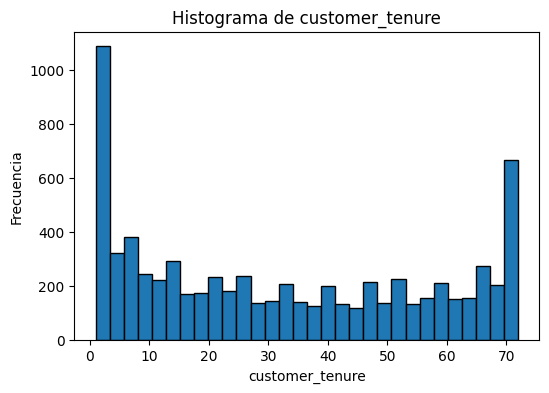

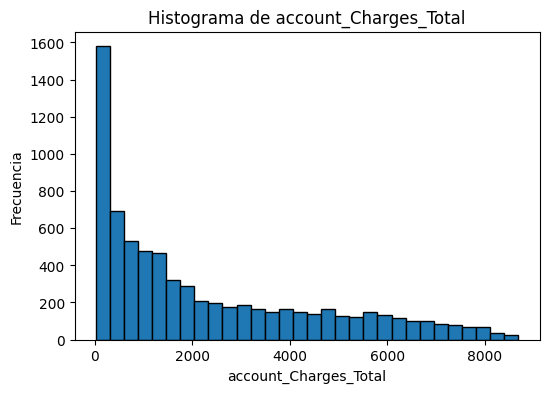

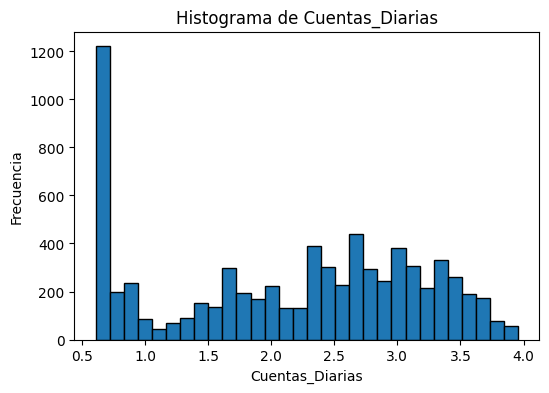

In [12]:
import matplotlib.pyplot as plt

variables = ["customer_tenure", "account_Charges_Total", "Cuentas_Diarias"]

for var in variables:
    plt.figure(figsize=(6,4))
    plt.hist(df[var], bins=30, edgecolor="black")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


Al realizar el histograma de las 3 variables cuantitativas, observamos que ninguna tiene una distribución normal, por lo que procedemos a realizar transformaciones a ver si se pueden normalizar las variables

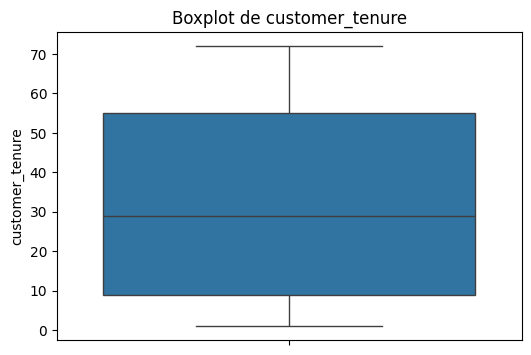

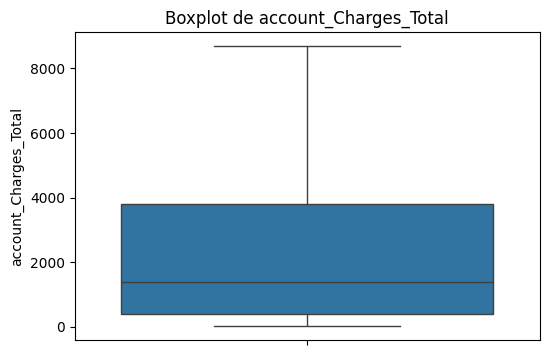

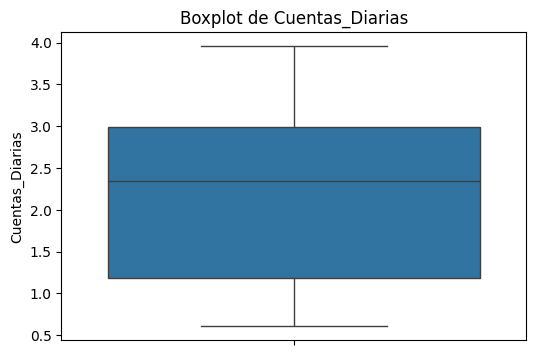

In [13]:
import seaborn as sns

variables = ["customer_tenure", "account_Charges_Total", "Cuentas_Diarias"]

for var in variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[var])
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.show()



Con el gráfico de cajas, observamos que no hay datos atípicos, por lo que los picos de datos pueden no estar relacionados con datos atípicos.

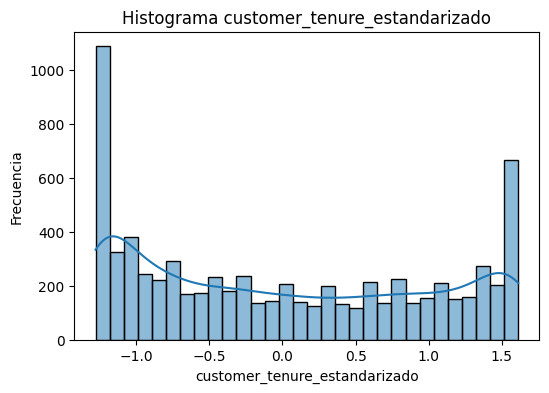

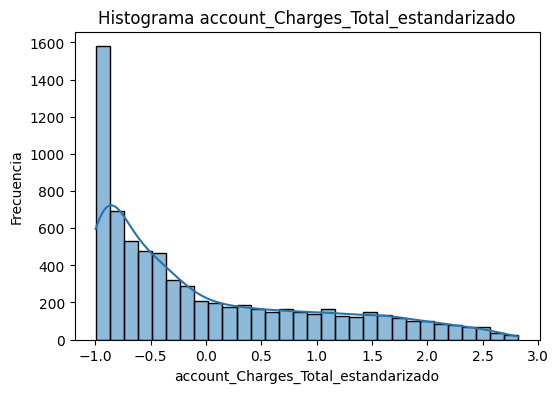

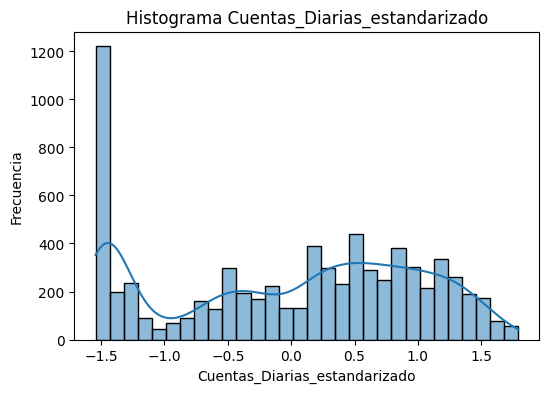

In [14]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a escalar
variables = ["customer_tenure", "account_Charges_Total", "Cuentas_Diarias"]

# Copia del DataFrame
df_std = df.copy()

# Escalador Min-Max
scaler = StandardScaler()
scaled = scaler.fit_transform(df[variables])

# Crear nuevas columnas con sufijo "_estandarizado"
df_std = df_std.drop(columns=variables)  # eliminar originales
df_std[[var + "_estandarizado" for var in variables]] = scaled

# Graficar histogramas normalizados
for var in [v + "_estandarizado" for v in variables]:
    plt.figure(figsize=(6,4))
    sns.histplot(df_std[var], bins=30, kde=True)
    plt.title(f"Histograma {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()



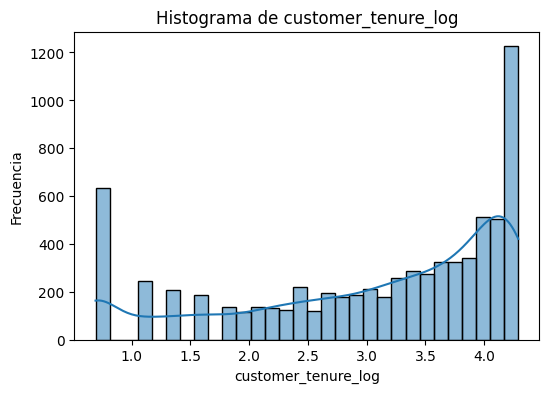

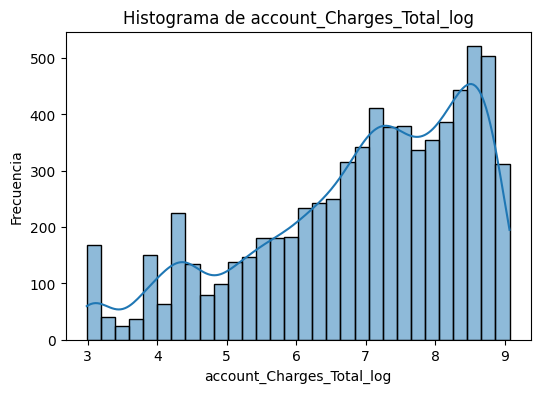

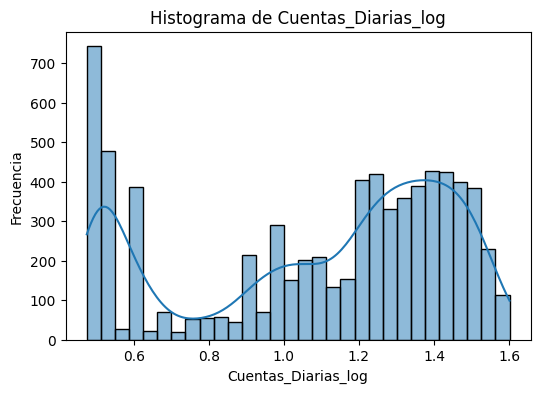

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame
df_log = df.copy()

# Variables originales y sus nuevas versiones
variables = ["customer_tenure", "account_Charges_Total", "Cuentas_Diarias"]
variables_nuevas = [var + "_log" for var in variables]

# Crear las nuevas columnas transformadas y eliminar las originales
df_log = df_log.drop(columns=variables)  # eliminar originales
df_log[variables_nuevas] = np.log(df[variables] + 1)

# Graficar histogramas de las variables logaritmizadas
for var in variables_nuevas:
    plt.figure(figsize=(6,4))
    sns.histplot(df_log[var], bins=30, kde=True)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()




Con la normalización de los datos no cambiamos su distribución, sin embargo, tomaremos la transformación logarítmica ya que si cambia su distribución y si bien no adopta una distribución normal, si ayuda en algunos casos a mejorar la distribución de los datos. De todas maneras, si es necesario volveremos a este punto en el futuro, si eso nos ayuda a mejorar el modelo.

## Análisis de correlación

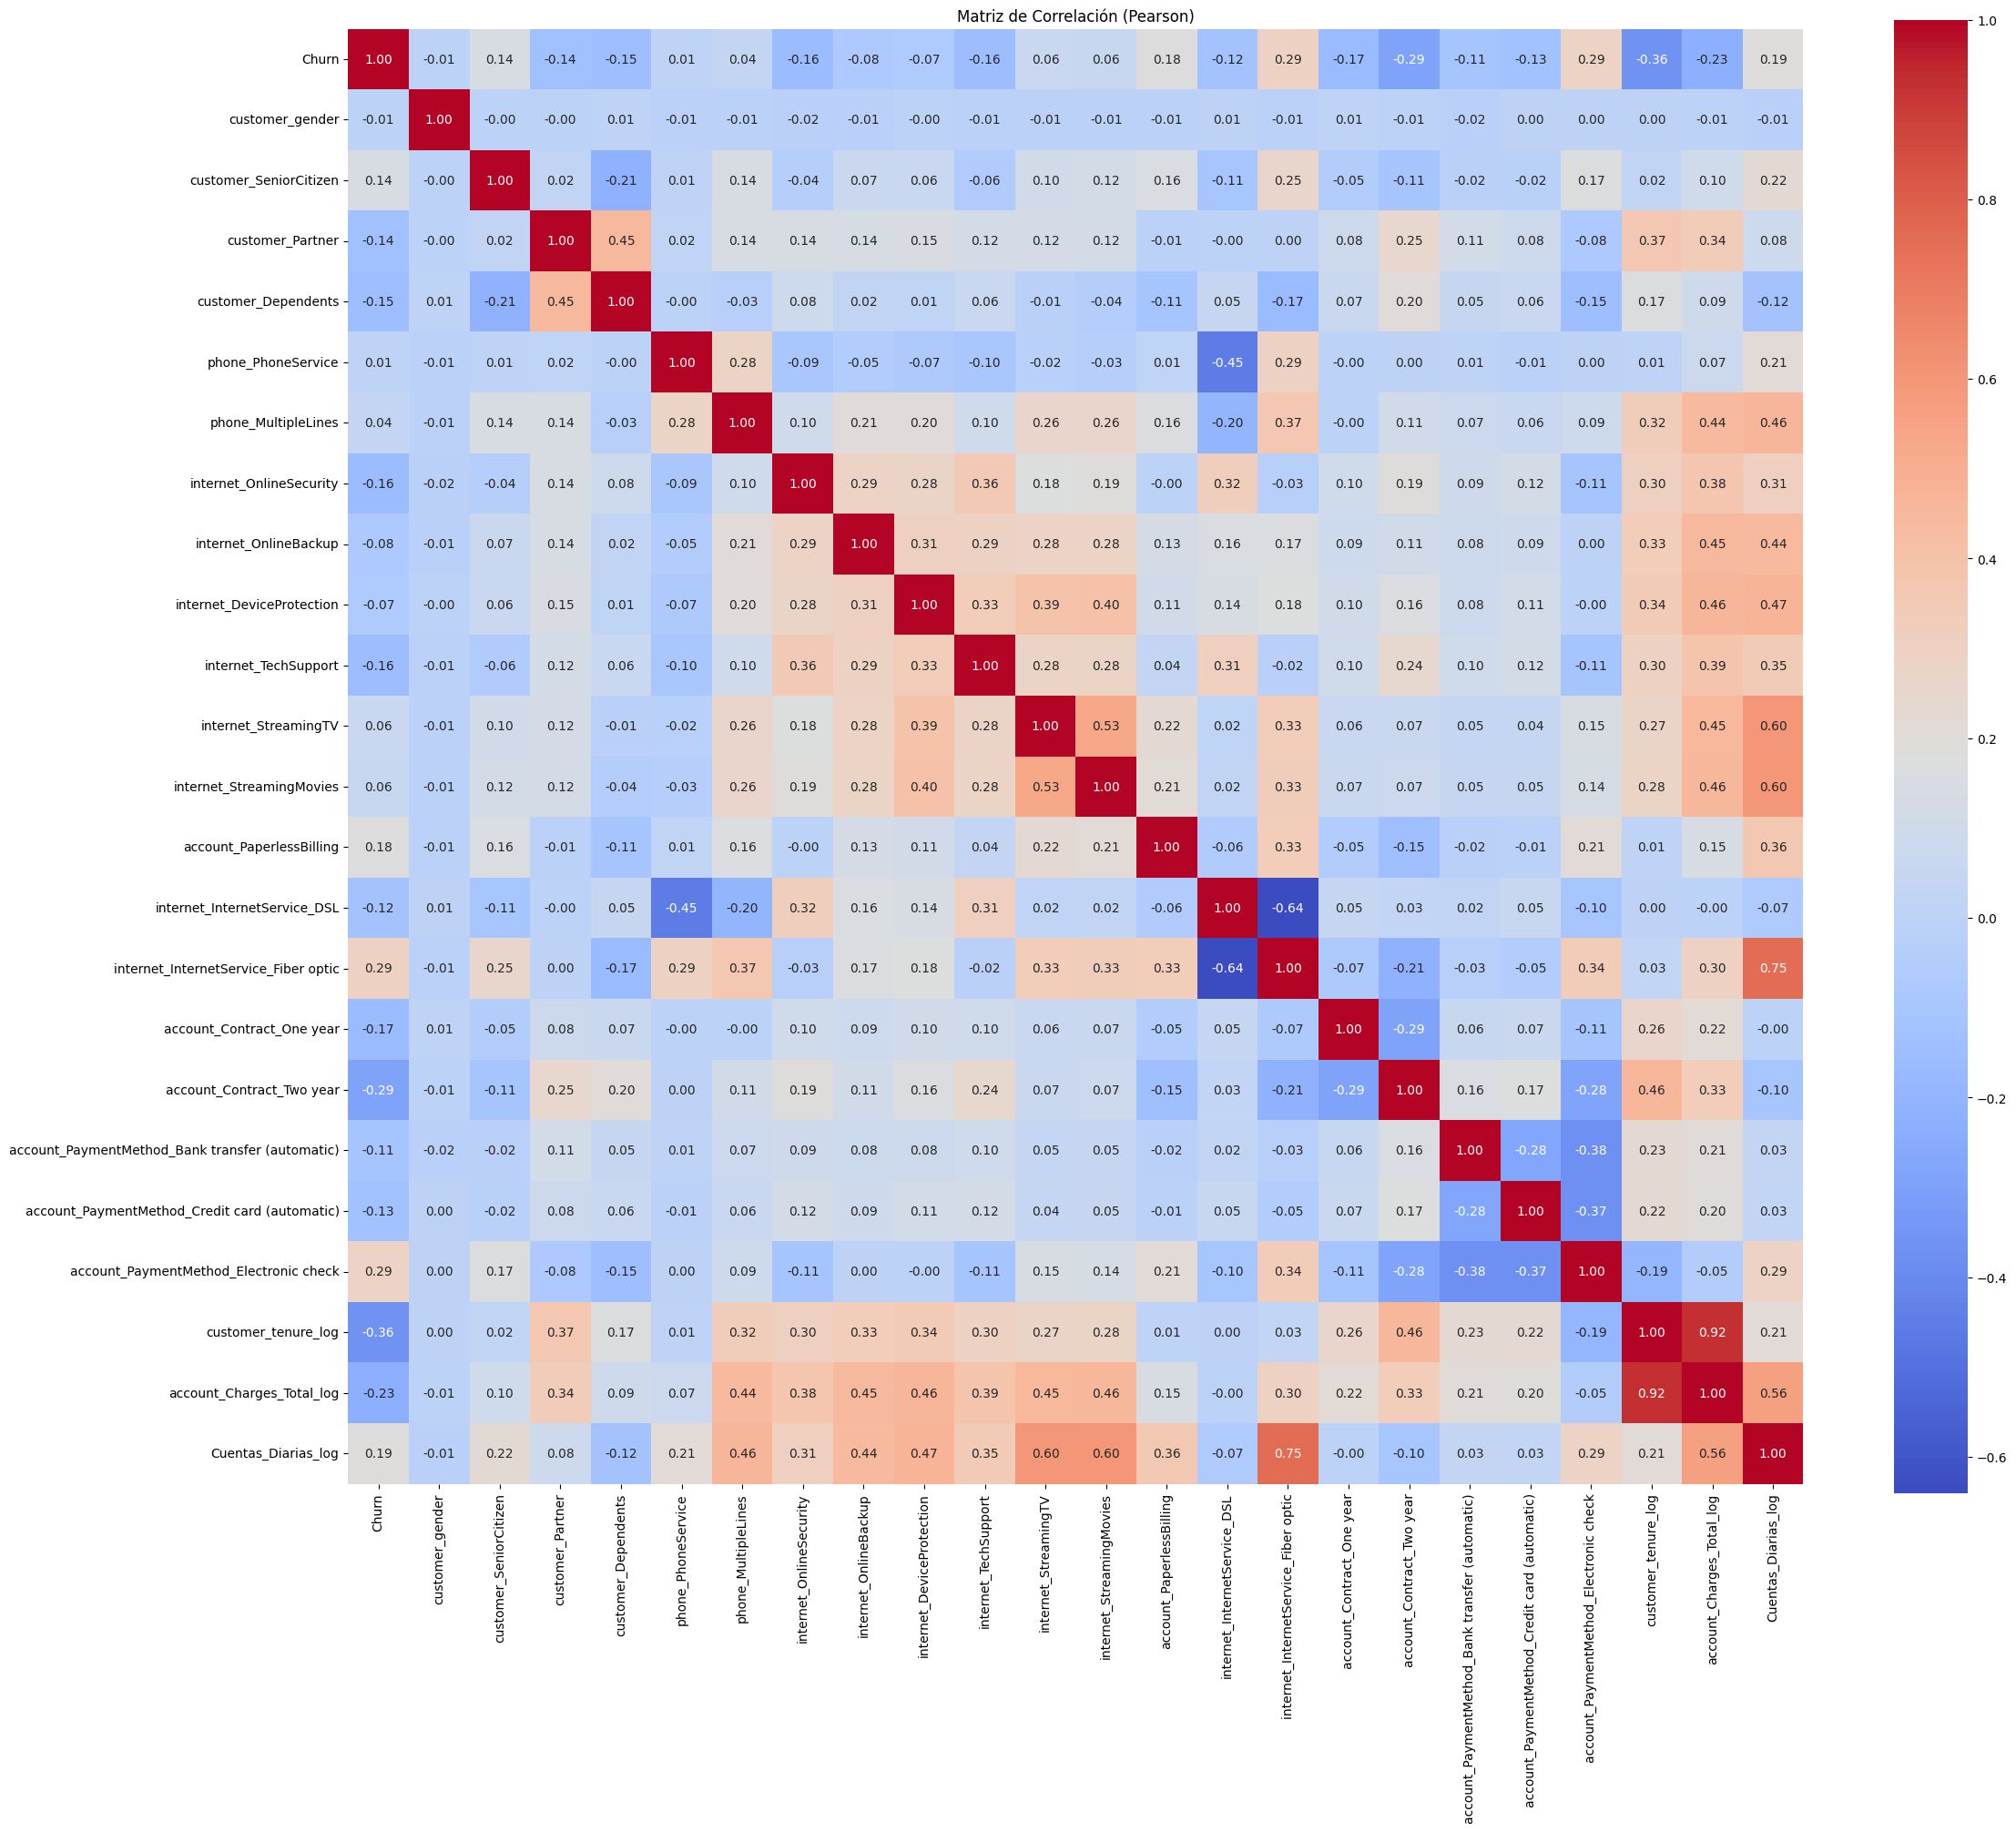

In [16]:
matriz_pearson = df_log.corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))
sns.heatmap(matriz_pearson, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlación (Pearson)')
plt.tight_layout()
plt.show()

Encontramos fuerte correlación entre "customer_tenure" y "Account charges total_log" así como en "cuentas_diarias_log" e "internet_internetService_Fiber optic", sin embargo como estas correlaciones no son iguales a 1, las conservamos por ahora para crear nuestro modelo.

Observamos además que "customer_tenure_log", "account_Contract_Two_year" "account_Charges_Total_log" tienen una destacada correlación negativa con la variable "churn" y, por el contrario "internet_Internet_Service_Fiber optic" y "account_PaymentMethod_Electronic check" tienen una correlación positiva. quizás estas variables serán muy importantes en el modelo a construir.


## Análisis Dirigido

Como validamos en el análisis de correlación, observamos que algunas variables tienen una significativa correlación frente a la variable clave "Churn", es por eso que

/tmp/ipython-input-3495571801.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df_log, palette=palette)
/tmp/ipython-input-3495571801.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df_log, palette=palette)
/tmp/ipython-input-3495571801.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df_log, palette=palette)
/tmp/ipython-input-3495571801.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

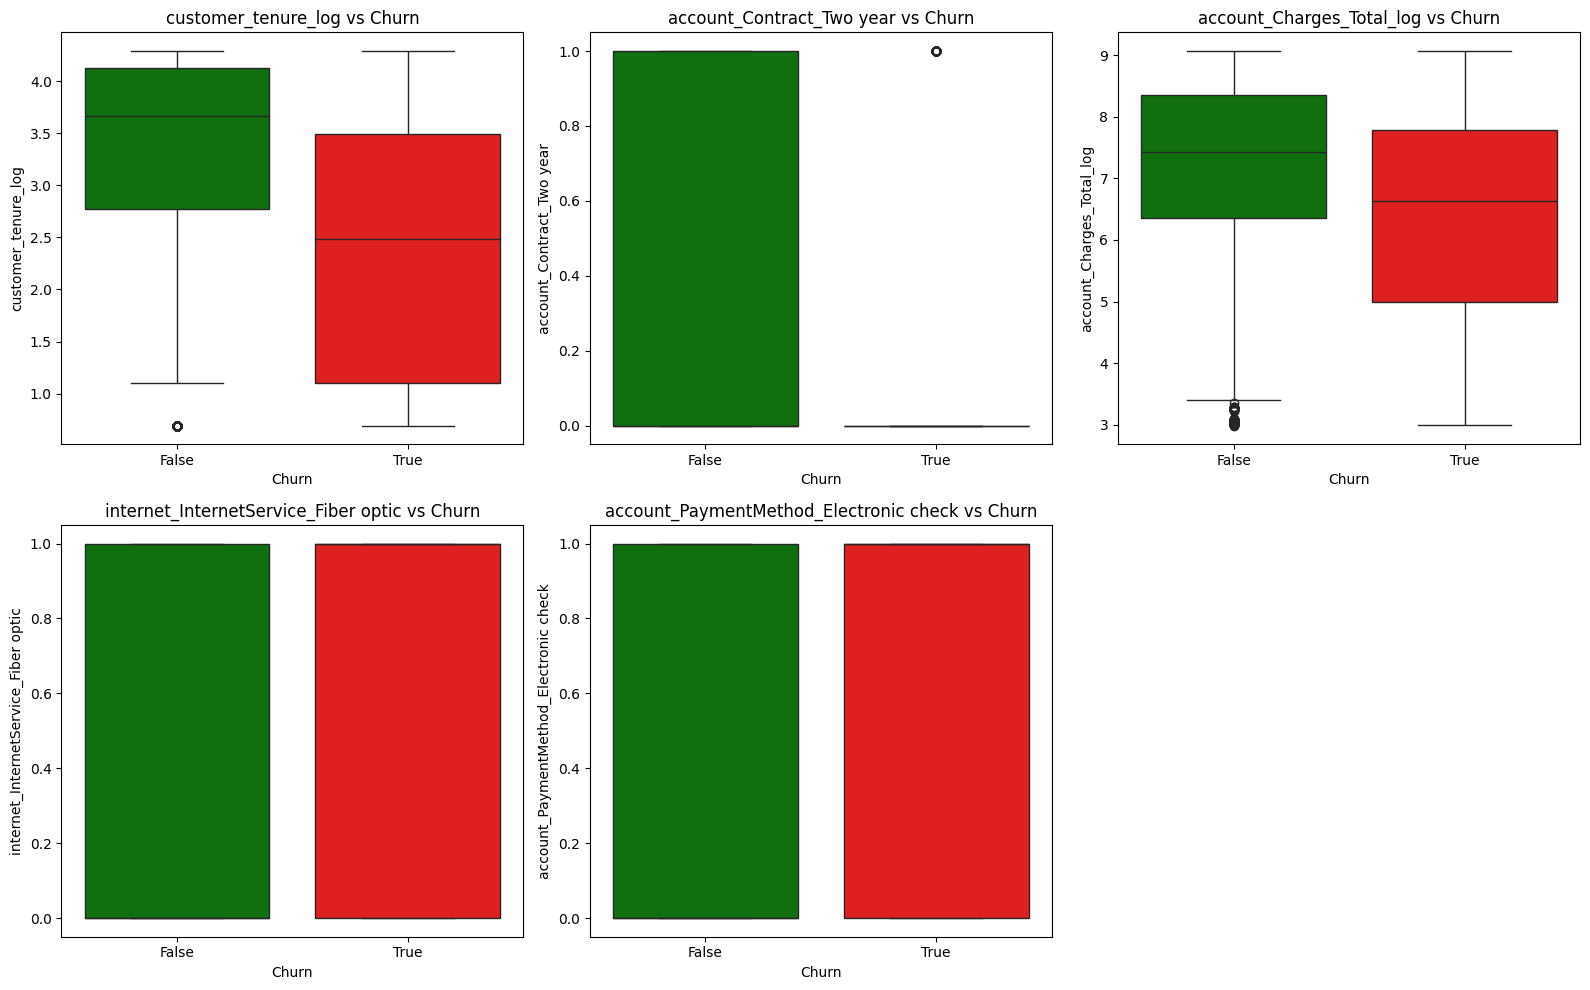

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a graficar
variables = [
    "customer_tenure_log",
    "account_Contract_Two year",
    "account_Charges_Total_log",
    "internet_InternetService_Fiber optic",
    "account_PaymentMethod_Electronic check"
]

# Definir colores: 0 = verde, 1 = rojo
palette = {"False": "green", "True": "red"}

# Crear figura
plt.figure(figsize=(16, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Churn", y=var, data=df_log, palette=palette)
    plt.title(f"{var} vs Churn")

plt.tight_layout()
plt.show()


vemos que las variables como "customer_tenure_log", "account_Contrat_Two year" y "account_Charges_Total_log", tienen una relación inversa con la variable "churn" y tiene sentido ya que los clientes que más tiempo han durado y más han gastado, probablemente no abandonen la compañía. En el futuro queremos buscar más relaciones como estas a través de los modelos con el objetivo de encontrar patrones de abandono de la compañía.

## **Creación del modelo**

Procedemos en primer lugar a dividir la base de testeo y de entrenamiento

In [18]:
from sklearn.model_selection import train_test_split


X=df_log.drop(columns='Churn')
y=df_log['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Modelo Benchmark**

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5079 entries, 4688 to 860
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customer_gender                                  5079 non-null   bool   
 1   customer_SeniorCitizen                           5079 non-null   bool   
 2   customer_Partner                                 5079 non-null   bool   
 3   customer_Dependents                              5079 non-null   bool   
 4   phone_PhoneService                               5079 non-null   bool   
 5   phone_MultipleLines                              5079 non-null   bool   
 6   internet_OnlineSecurity                          5079 non-null   bool   
 7   internet_OnlineBackup                            5079 non-null   bool   
 8   internet_DeviceProtection                        5079 non-null   bool   
 9   internet_TechSupport             

In [20]:
import statsmodels.api as sm
import pandas as pd

# --- 1. Detectar columnas booleanas en X_train y X_test ---
bool_cols_train = X_train.select_dtypes(include=["bool"]).columns
bool_cols_test  = X_test.select_dtypes(include=["bool"]).columns

print("Columnas booleanas en X_train:", list(bool_cols_train))
print("Columnas booleanas en X_test:", list(bool_cols_test))

# --- 2. Convertir booleanas a numéricas (0/1) ---
X_train[bool_cols_train] = X_train[bool_cols_train].astype(int)
X_test[bool_cols_test]   = X_test[bool_cols_test].astype(int)

# --- 3. Convertir y_train a numérico ---
y_train = y_train.astype(int)
y_test  = y_test.astype(int)

Columnas booleanas en X_train: ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'internet_InternetService_DSL', 'internet_InternetService_Fiber optic', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaymentMethod_Bank transfer (automatic)', 'account_PaymentMethod_Credit card (automatic)', 'account_PaymentMethod_Electronic check']
Columnas booleanas en X_test: ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'internet_InternetService_DSL

In [21]:
# --- 4. Agregar constante ---
X_train_log_reg = sm.add_constant(X_train)

# --- 5. Ajustar modelo Logit ---
modelo_logit = sm.Logit(y_train, X_train)
resultado = modelo_logit.fit()

# --- 6. Mostrar resumen ---
print(resultado.summary())


Optimization terminated successfully.
         Current function value: 0.452746
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5079
Model:                          Logit   Df Residuals:                     5056
Method:                           MLE   Df Model:                           22
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2488
Time:                        18:09:25   Log-Likelihood:                -2299.5
converged:                       True   LL-Null:                       -3061.1
Covariance Type:            nonrobust   LLR p-value:                3.223e-309
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
customer_gender                   

Nuestro modelo inicial es capaz de explicar alrededor del 24,93% de las variaciones de Y, por lo tanto este será nuestro punto de partida para los demás modelos.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones del modelo
y_prob = resultado.predict(X_test)

# Convertir probabilidades a clases (umbral 0.5)
y_pred = np.where(y_prob >= 0.5, 1, 0)

# --- Métricas ---
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
matriz    = confusion_matrix(y_test, y_pred)

# Crear DataFrame con las métricas
metricas_df = pd.DataFrame({
    "Benchmark": [exactitud, precision, recall, f1]
}, index=["Exactitud", "Precisión", "Recall", "F1 Score"])

print(metricas_df)


print("Exactitud (Accuracy):", exactitud)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nMatriz de Confusión:\n", matriz)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

           Benchmark
Exactitud   0.791915
Precisión   0.674468
Recall      0.513776
F1 Score    0.583257
Exactitud (Accuracy): 0.7919154800183739
Precisión: 0.674468085106383
Recall: 0.513776337115073
F1-Score: 0.5832566697332107

Matriz de Confusión:
 [[1407  153]
 [ 300  317]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1560
           1       0.67      0.51      0.58       617

    accuracy                           0.79      2177
   macro avg       0.75      0.71      0.72      2177
weighted avg       0.78      0.79      0.78      2177



### Otros modelos de regresión

Para empezar, haremos un modelo reducido quitando las variables irrelevantes a ver si el modelo mejora

In [23]:
# Extraer los coeficientes y p-valores
coeficientes = resultado.params
pvalores = resultado.pvalues

# Crear un DataFrame
importancia = pd.DataFrame({
    "Variable": coeficientes.index,
    "Coeficiente": coeficientes.values,
    "p-valor": pvalores.values.round(4)
})

# Ordenar por valor absoluto del coeficiente
importancia["Abs_Coef"] = importancia["Coeficiente"].abs()
importancia = importancia.sort_values(by="p-valor", ascending=True)

print(importancia)


                                           Variable  Coeficiente  p-valor  \
12                         account_PaperlessBilling     0.358578   0.0000   
15                        account_Contract_One year    -0.535094   0.0000   
19           account_PaymentMethod_Electronic check     0.480441   0.0000   
16                        account_Contract_Two year    -1.006361   0.0000   
5                               phone_MultipleLines     0.372162   0.0008   
9                              internet_TechSupport    -0.349076   0.0027   
1                            customer_SeniorCitizen     0.268857   0.0054   
6                           internet_OnlineSecurity    -0.317526   0.0064   
20                              customer_tenure_log    -0.778537   0.0087   
11                         internet_StreamingMovies     0.377103   0.0227   
10                             internet_StreamingTV     0.368565   0.0247   
14             internet_InternetService_Fiber optic     1.866941   0.0479   

In [24]:

# --- 1. Extraer coeficientes y p-valores del modelo anterior ---
coeficientes = resultado.params
pvalores = resultado.pvalues

importancia = pd.DataFrame({
    "Variable": coeficientes.index,
    "Coeficiente": coeficientes.values,
    "p-valor": pvalores.values
})

# --- 2. Filtrar variables con p < 0.05 ---
variables_significativas = importancia[importancia["p-valor"] < 0.05]["Variable"]

# Eliminar la constante si está en la lista (la agregamos aparte)
variables_significativas = variables_significativas.drop("const", errors="ignore")
print("Variables seleccionadas:", list(variables_significativas))

# --- 3. Crear nuevo modelo solo con esas variables ---
X_train_reducido = sm.add_constant(X_train[variables_significativas])
X_test_reducido = sm.add_constant(X_test[variables_significativas])
modelo_logit_reducido = sm.Logit(y_train, X_train_reducido)
resultado_reducido = modelo_logit_reducido.fit()

# --- 4. Mostrar resumen del nuevo modelo ---
print(resultado_reducido.summary())


Variables seleccionadas: ['customer_SeniorCitizen', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'internet_InternetService_Fiber optic', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaymentMethod_Bank transfer (automatic)', 'account_PaymentMethod_Electronic check', 'customer_tenure_log']
Optimization terminated successfully.
         Current function value: 0.458519
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5079
Model:                          Logit   Df Residuals:                     5065
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2392
Time:                        18:09:26   Log-Likelihood:                -2328.8
conv

In [25]:


# --- 2. Predicciones modelo reducido ---
X_test_reducido = sm.add_constant(X_test[variables_significativas])
y_pred_prob_reducido = resultado_reducido.predict(X_test_reducido)
y_pred_reducido = (y_pred_prob_reducido >= 0.5).astype(int)

# --- 3. Función para calcular métricas ---
def calcular_metricas(y_true, y_pred):
    return {
        "Exactitud": accuracy_score(y_true, y_pred),
        "Precisión": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# --- 4. Calcular métricas para ambos modelos ---
metricas_reducido = calcular_metricas(y_test, y_pred_reducido)

metricas_df['Modelo reducido'] = metricas_reducido.values()

print(metricas_df)


           Benchmark  Modelo reducido
Exactitud   0.791915         0.796050
Precisión   0.674468         0.687636
Recall      0.513776         0.513776
F1 Score    0.583257         0.588126


### Modelo knn

Hacemos un modelo de knn vecinos más cercanos con todas las variables, buscando seleccionar el número de vecinos óptimo:

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Lista de valores de k ---
k_values = list(range(2, 11)) + list(range(15, 55, 5)) + [100]

# --- Resultados ---
resultados = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados.append({
        'Vecinos (k)': k,
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1-score': f1
    })

# --- Convertir a DataFrame ---
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# --- Ordenado por F1 (opcional) ---
print("\nMejores modelos según F1-score:")
print(df_resultados.sort_values(by="F1-score", ascending=False).head())


    Vecinos (k)  Exactitud  Precisión    Recall  F1-score
0             2   0.739550   0.580645  0.291734  0.388350
1             3   0.742306   0.548780  0.510535  0.528967
2             4   0.757005   0.621547  0.364668  0.459653
3             5   0.752871   0.573284  0.500810  0.534602
4             6   0.764814   0.624113  0.427877  0.507692
5             7   0.765273   0.596715  0.529984  0.561373
6             8   0.769407   0.627494  0.458671  0.529963
7             9   0.766192   0.598540  0.531605  0.563090
8            10   0.768489   0.623632  0.461912  0.530726
9            15   0.775379   0.622137  0.528363  0.571429
10           20   0.779513   0.640082  0.507293  0.566004
11           25   0.780432   0.632887  0.536467  0.580702
12           30   0.787322   0.655242  0.526742  0.584007
13           35   0.789159   0.652510  0.547812  0.595595
14           40   0.789159   0.657371  0.534846  0.589812
15           45   0.792834   0.657795  0.560778  0.605424
16           5

Vemos que el pico es 45 vecinos, por lo que calculamos a partir de un rango más grande alrededor de 45 vecinos a ver si nos arroja algo mejor

In [27]:
# --- Lista de valores de k ---
k_values = list(range(35, 70))

# --- Resultados ---
resultados = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados.append({
        'Vecinos (k)': k,
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1-score': f1
    })

# --- Convertir a DataFrame ---
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# --- Ordenado por F1 (opcional) ---
print("\nMejores modelos según F1-score:")
print(df_resultados.sort_values(by="F1-score", ascending=False).head())


    Vecinos (k)  Exactitud  Precisión    Recall  F1-score
0            35   0.789159   0.652510  0.547812  0.595595
1            36   0.788241   0.656000  0.531605  0.587287
2            37   0.790997   0.655769  0.552674  0.599824
3            38   0.787781   0.653465  0.534846  0.588235
4            39   0.790997   0.655769  0.552674  0.599824
5            40   0.789159   0.657371  0.534846  0.589812
6            41   0.788700   0.647834  0.557536  0.599303
7            42   0.789619   0.656189  0.541329  0.593250
8            43   0.790997   0.652830  0.560778  0.603313
9            44   0.790537   0.657534  0.544571  0.595745
10           45   0.792834   0.657795  0.560778  0.605424
11           46   0.789159   0.656126  0.538088  0.591273
12           47   0.789619   0.650854  0.555916  0.599650
13           48   0.789619   0.658052  0.536467  0.591071
14           49   0.789159   0.652510  0.547812  0.595595
15           50   0.788700   0.657948  0.529984  0.587074
16           5

Como el mejor modelo es el de 45 vecinos, lo agregamos a los resultados:

In [28]:
# Obtener la fila con el mejor F1-score
mejor_modelo = df_resultados.loc[df_resultados['F1-score'].idxmax()]

# Guardar en metricas_df (como una Serie)
metricas_df['vecinos_45_X_completa'] = mejor_modelo[['Exactitud', 'Precisión', 'Recall', 'F1-score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa
Exactitud,0.791915,0.796050,0.792834
Precisión,0.674468,0.687636,0.657795
Recall,0.513776,0.513776,0.560778
F1 Score,0.583257,0.588126,0.605424


In [29]:
from sklearn.inspection import permutation_importance

knn_mejor = KNeighborsClassifier(n_neighbors=45)
knn_mejor.fit(X_train, y_train)
y_pred = knn_mejor.predict(X_test)

# Usamos el mejor modelo entrenado (supongamos knn_mejor)
resultado_perm = permutation_importance(knn_mejor, X_test, y_test,
                                        scoring='f1', n_repeats=10, random_state=42)

# Guardamos las importancias en un DataFrame
importancias_knn = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancias_knn)  # Top 10 variables más relevantes


                                           Variable  Importancia
20                              customer_tenure_log     0.154994
21                        account_Charges_Total_log     0.054353
14             internet_InternetService_Fiber optic     0.039105
13                     internet_InternetService_DSL     0.026741
19           account_PaymentMethod_Electronic check     0.024487
12                         account_PaperlessBilling     0.021031
5                               phone_MultipleLines     0.020104
10                             internet_StreamingTV     0.016635
11                         internet_StreamingMovies     0.014413
22                              Cuentas_Diarias_log     0.013529
15                        account_Contract_One year     0.011576
1                            customer_SeniorCitizen     0.009257
7                             internet_OnlineBackup     0.007597
6                           internet_OnlineSecurity     0.006895
0                        

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleccionamos las 11 variables más importantes
top_11_vars = importancias_knn.head(11)['Variable'].tolist()

X_train_11 = X_train[top_11_vars]
X_test_11  = X_test[top_11_vars]

# Rango de vecinos: 2 a 10, luego de 15 a 50 de 5 en 5, y 100
vecinos = list(range(2, 11)) + list(range(15, 51, 5)) + [100]

# DataFrame para guardar métricas
metricas_knn_top11 = pd.DataFrame(columns=['Vecinos', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_11, y_train)
    y_pred = knn.predict(X_test_11)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    metricas_knn_top11 = pd.concat([metricas_knn_top11, pd.DataFrame({
        'Vecinos': [k],
        'Exactitud': [exactitud],
        'Precisión': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })], ignore_index=True)

# Mostramos tabla ordenada por F1 Score descendente
metricas_knn_top11 = metricas_knn_top11.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(metricas_knn_top11.head(10))  # Top 10 configuraciones


/tmp/ipython-input-3378989877.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas_knn_top11 = pd.concat([metricas_knn_top11, pd.DataFrame({


  Vecinos  Exactitud  Precisión    Recall  F1 Score
0      25   0.791915   0.664000  0.538088  0.594449
1      45   0.790537   0.663286  0.529984  0.589189
2      30   0.795131   0.683084  0.517018  0.588561
3      35   0.789619   0.661258  0.528363  0.587387
4     100   0.790078   0.665289  0.521880  0.584923
5      40   0.790997   0.672340  0.512156  0.581417
6      50   0.789619   0.666667  0.515397  0.581353
7      15   0.783188   0.642436  0.529984  0.580817
8       9   0.774920   0.618250  0.538088  0.575390
9      20   0.788241   0.669565  0.499190  0.571959


In [31]:
# Rango de vecinos: 2 a 10, luego de 15 a 50 de 5 en 5, y 100
vecinos = list(range(20, 51))

# DataFrame para guardar métricas
metricas_knn_top11 = pd.DataFrame(columns=['Vecinos', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_11, y_train)
    y_pred = knn.predict(X_test_11)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    metricas_knn_top11 = pd.concat([metricas_knn_top11, pd.DataFrame({
        'Vecinos': [k],
        'Exactitud': [exactitud],
        'Precisión': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })], ignore_index=True)

# Mostramos tabla ordenada por F1 Score descendente
metricas_knn_top11 = metricas_knn_top11.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(metricas_knn_top11.head(10))  # Top 10 configuraciones


/tmp/ipython-input-4195310135.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas_knn_top11 = pd.concat([metricas_knn_top11, pd.DataFrame({


  Vecinos  Exactitud  Precisión    Recall  F1 Score
0      37   0.796509   0.679012  0.534846  0.598368
1      49   0.794212   0.670020  0.539708  0.597846
2      23   0.793753   0.670732  0.534846  0.595131
3      39   0.790997   0.660079  0.541329  0.594835
4      25   0.791915   0.664000  0.538088  0.594449
5      27   0.791915   0.664000  0.538088  0.594449
6      21   0.789159   0.655512  0.539708  0.592000
7      41   0.791915   0.666667  0.531605  0.591524
8      47   0.790997   0.663306  0.533225  0.591195
9      29   0.792834   0.670782  0.528363  0.591115


In [32]:
metricas_df['vecinos_37_X_reducida']= metricas_knn_top11.iloc[0][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida
Exactitud,0.791915,0.796050,0.792834,0.796509
Precisión,0.674468,0.687636,0.657795,0.679012
Recall,0.513776,0.513776,0.560778,0.534846
F1 Score,0.583257,0.588126,0.605424,0.598368


### **Modelo de árbol de decisión**

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el árbol sin límite de profundidad
arbol = DecisionTreeClassifier(random_state=42, max_depth=None)
arbol.fit(X_train, y_train)

# Calcular la profundidad alcanzada
profundidad = arbol.get_depth()
n_nodos = arbol.tree_.node_count

print(f"Profundidad máxima alcanzada: {profundidad}")
print(f"Número total de nodos: {n_nodos}")


Profundidad máxima alcanzada: 32
Número total de nodos: 2247


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Diccionario para guardar resultados
resultados = {}

# Probar valores de max_depth de 2 a 30
for profundidad in range(2, 31):
    arbol = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)

    # Calcular métricas
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados[f'max_depth_{profundidad}'] = {
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convertir a DataFrame
metricas_arbol = pd.DataFrame(resultados).T
print(metricas_arbol)

# Mostrar el mejor modelo según F1-score
mejor_modelo = metricas_arbol['F1 Score'].idxmax()
print(f"\n👉 El mejor modelo fue: {mejor_modelo}")
print(metricas_arbol.loc[mejor_modelo])


              Exactitud  Precisión    Recall  F1 Score
max_depth_2    0.783647   0.722561  0.384117  0.501587
max_depth_3    0.783647   0.722561  0.384117  0.501587
max_depth_4    0.779513   0.645435  0.492707  0.558824
max_depth_5    0.777676   0.639413  0.494327  0.557587
max_depth_6    0.781350   0.636364  0.533225  0.580247
max_depth_7    0.759761   0.580205  0.551053  0.565254
max_depth_8    0.761139   0.578606  0.578606  0.578606
max_depth_9    0.751034   0.568807  0.502431  0.533563
max_depth_10   0.748277   0.558179  0.536467  0.547107
max_depth_11   0.737712   0.542751  0.473258  0.505628
max_depth_12   0.726229   0.518198  0.484603  0.500838
max_depth_13   0.723013   0.511986  0.484603  0.497918
max_depth_14   0.713826   0.495050  0.486224  0.490597
max_depth_15   0.713367   0.494453  0.505673  0.500000
max_depth_16   0.714286   0.495881  0.487844  0.491830
max_depth_17   0.706936   0.483771  0.507293  0.495253
max_depth_18   0.713826   0.495192  0.500810  0.497985
max_depth_

In [35]:
metricas_df['DecisionTree_Complete']= metricas_arbol.loc[mejor_modelo][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df
#

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364
Recall,0.513776,0.513776,0.560778,0.534846,0.533225
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar de nuevo el mejor modelo
mejor_profundidad = int(mejor_modelo.split("_")[-1])  # sacar el número del nombre "max_depth_X"
arbol_mejor = DecisionTreeClassifier(max_depth=mejor_profundidad, random_state=42)
arbol_mejor.fit(X_train, y_train)

# Importancias
importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': arbol_mejor.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n📌 Variables más relevantes del mejor árbol:")
print(importancias.head(15))  # Top 15



📌 Variables más relevantes del mejor árbol:
                                  Variable  Importancia
20                     customer_tenure_log     0.428796
14    internet_InternetService_Fiber optic     0.281149
21               account_Charges_Total_log     0.051252
22                     Cuentas_Diarias_log     0.042570
13            internet_InternetService_DSL     0.042498
19  account_PaymentMethod_Electronic check     0.029774
16               account_Contract_Two year     0.022605
5                      phone_MultipleLines     0.021412
9                     internet_TechSupport     0.014250
11                internet_StreamingMovies     0.012802
15               account_Contract_One year     0.008756
12                account_PaperlessBilling     0.007955
10                    internet_StreamingTV     0.007656
1                   customer_SeniorCitizen     0.007011
4                       phone_PhoneService     0.006189


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- 1. Probar varias profundidades ---
resultados = []

for d in range(2, 31):
    arbol = DecisionTreeClassifier(max_depth=d, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)

    resultados.append({
        "max_depth": d,
        "Exactitud": accuracy_score(y_test, y_pred),
        "Precisión": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Modelo": arbol
    })

# Pasamos a DataFrame
df_resultados = pd.DataFrame(resultados).drop(columns=["Modelo"])
print("📊 Métricas por profundidad (2-30):")
print(df_resultados)

# --- 2. Seleccionar mejor modelo según F1 ---
mejor_fila = max(resultados, key=lambda x: x["F1"])
mejor_profundidad = mejor_fila["max_depth"]
mejor_modelo = mejor_fila["Modelo"]

print(f"\n✅ Mejor modelo: max_depth={mejor_profundidad}, F1={mejor_fila['F1']:.4f}")

# --- 3. Importancias del mejor modelo ---
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": mejor_modelo.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# Top 10 variables
top10_vars = importancias.head(10)["Variable"].tolist()
print("\n📌 Top 10 variables más importantes:")
print(top10_vars)

# --- 4. Reentrenar con las 10 más importantes ---
arbol_top10 = DecisionTreeClassifier(max_depth=mejor_profundidad, random_state=42)
arbol_top10.fit(X_train[top10_vars], y_train)

y_pred_top10 = arbol_top10.predict(X_test[top10_vars])

# Métricas finales
metricas_top10 = pd.DataFrame([{
    "Exactitud": accuracy_score(y_test, y_pred_top10),
    "Precisión": precision_score(y_test, y_pred_top10),
    "Recall": recall_score(y_test, y_pred_top10),
    "F1 Score": f1_score(y_test, y_pred_top10)
}], index=["Árbol Top10 Variables"])

print("\n📊 Métricas del modelo con 10 variables más relevantes:")
print(metricas_top10)

# --- 5. Importancia dentro del submodelo ---
importancias_top10 = pd.DataFrame({
    "Variable": top10_vars,
    "Importancia": arbol_top10.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\n📌 Importancia de las variables en el submodelo:")
print(importancias_top10)


📊 Métricas por profundidad (2-30):
    max_depth  Exactitud  Precisión    Recall        F1
0           2   0.783647   0.722561  0.384117  0.501587
1           3   0.783647   0.722561  0.384117  0.501587
2           4   0.779513   0.645435  0.492707  0.558824
3           5   0.777676   0.639413  0.494327  0.557587
4           6   0.781350   0.636364  0.533225  0.580247
5           7   0.759761   0.580205  0.551053  0.565254
6           8   0.761139   0.578606  0.578606  0.578606
7           9   0.751034   0.568807  0.502431  0.533563
8          10   0.748277   0.558179  0.536467  0.547107
9          11   0.737712   0.542751  0.473258  0.505628
10         12   0.726229   0.518198  0.484603  0.500838
11         13   0.723013   0.511986  0.484603  0.497918
12         14   0.713826   0.495050  0.486224  0.490597
13         15   0.713367   0.494453  0.505673  0.500000
14         16   0.714286   0.495881  0.487844  0.491830
15         17   0.706936   0.483771  0.507293  0.495253
16         18

In [38]:
metricas_top10 = metricas_top10.reset_index(drop=True)

metricas_df['Decision_Tree_reducida']= metricas_top10.loc[0][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543


## **Cambiando el escalador**

Para este ejercicio logaritmizamos las variables cuantitativas, sin embargo, hay otras formas de estandarización, por lo que cambiaremos la escalay repetiremos el ejercicio a ver si los resultados mejoran.

### **Modelos de regresión**

In [69]:
X=df_std.drop(columns='Churn')
y=df_std['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# --- 1. Detectar columnas booleanas en X_train y X_test ---
bool_cols_train = X_train.select_dtypes(include=["bool"]).columns
bool_cols_test  = X_test.select_dtypes(include=["bool"]).columns

print("Columnas booleanas en X_train:", list(bool_cols_train))
print("Columnas booleanas en X_test:", list(bool_cols_test))

# --- 2. Convertir booleanas a numéricas (0/1) ---
X_train[bool_cols_train] = X_train[bool_cols_train].astype(int)
X_test[bool_cols_test]   = X_test[bool_cols_test].astype(int)

# --- 3. Convertir y_train a numérico ---
y_train = y_train.astype(int)
y_test  = y_test.astype(int)

Columnas booleanas en X_train: ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'internet_InternetService_DSL', 'internet_InternetService_Fiber optic', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaymentMethod_Bank transfer (automatic)', 'account_PaymentMethod_Credit card (automatic)', 'account_PaymentMethod_Electronic check']
Columnas booleanas en X_test: ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'internet_InternetService_DSL

In [71]:
# --- 4. Agregar constante ---
X_train_log_reg = sm.add_constant(X_train)

# --- 5. Ajustar modelo Logit ---
modelo_logit = sm.Logit(y_train, X_train)
resultado = modelo_logit.fit()

# --- 6. Mostrar resumen ---
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.460397
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5079
Model:                          Logit   Df Residuals:                     5056
Method:                           MLE   Df Model:                           22
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2361
Time:                        18:59:49   Log-Likelihood:                -2338.4
converged:                       True   LL-Null:                       -3061.1
Covariance Type:            nonrobust   LLR p-value:                1.433e-292
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
customer_gender                   

In [72]:
# Predicciones del modelo
y_prob = resultado.predict(X_test)

# Convertir probabilidades a clases (umbral 0.5)
y_pred = np.where(y_prob >= 0.5, 1, 0)

# --- Métricas ---
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
matriz    = confusion_matrix(y_test, y_pred)

# Crear DataFrame con las métricas
metricas_df['Reg_Total_std']= [exactitud, precision, recall, f1]


print("Exactitud (Accuracy):", exactitud)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nMatriz de Confusión:\n", matriz)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud (Accuracy): 0.7827285254937988
Precisión: 0.644
Recall: 0.5218800648298217
F1-Score: 0.576544315129812

Matriz de Confusión:
 [[1382  178]
 [ 295  322]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1560
           1       0.64      0.52      0.58       617

    accuracy                           0.78      2177
   macro avg       0.73      0.70      0.72      2177
weighted avg       0.77      0.78      0.78      2177



In [43]:
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544


In [73]:
# --- 1. Extraer coeficientes y p-valores del modelo anterior ---
coeficientes = resultado.params
pvalores = resultado.pvalues

importancia = pd.DataFrame({
    "Variable": coeficientes.index,
    "Coeficiente": coeficientes.values,
    "p-valor": pvalores.values
})

# --- 2. Filtrar variables con p < 0.05 ---
variables_significativas = importancia[importancia["p-valor"] < 0.05]["Variable"]

# Eliminar la constante si está en la lista (la agregamos aparte)
variables_significativas = variables_significativas.drop("const", errors="ignore")
print("Variables seleccionadas:", list(variables_significativas))

# --- 3. Crear nuevo modelo solo con esas variables ---
X_train_reducido = sm.add_constant(X_train[variables_significativas])
X_test_reducido = sm.add_constant(X_test[variables_significativas])
modelo_logit_reducido = sm.Logit(y_train, X_train_reducido)
resultado_reducido = modelo_logit_reducido.fit()

print(resultado_reducido.summary())

Variables seleccionadas: ['customer_SeniorCitizen', 'phone_PhoneService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'account_PaperlessBilling', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaymentMethod_Electronic check', 'customer_tenure_estandarizado', 'account_Charges_Total_estandarizado', 'Cuentas_Diarias_estandarizado']
Optimization terminated successfully.
         Current function value: 0.460928
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5079
Model:                          Logit   Df Residuals:                     5065
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.2352
Time:                        18:59:58   Log-Likelihood:                -2341.1
converged:  

In [45]:
# --- 2. Predicciones modelo reducido ---
X_test_reducido = sm.add_constant(X_test[variables_significativas])
y_pred_prob_reducido = resultado_reducido.predict(X_test_reducido)
y_pred_reducido = (y_pred_prob_reducido >= 0.5).astype(int)

# --- 3. Función para calcular métricas ---
def calcular_metricas(y_true, y_pred):
    return {
        "Exactitud": accuracy_score(y_true, y_pred),
        "Precisión": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# --- 4. Calcular métricas para ambos modelos ---
metricas_reducido = calcular_metricas(y_test, y_pred_reducido)

metricas_df['Modelo reducido_std'] = metricas_reducido.values()

metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std,Modelo reducido_std
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729,0.785025
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000,0.650505
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880,0.521880
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544,0.579137


### **Modelos de knn**

In [46]:
# --- Lista de valores de k ---
k_values = list(range(2, 11)) + list(range(15, 55, 5)) + [100]

# --- Resultados ---
resultados = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados.append({
        'Vecinos (k)': k,
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1-score': f1
    })

df_resultados = pd.DataFrame(resultados)

# --- Ordenado por F1 (opcional) ---
print("\nMejores modelos según F1-score:")
print(df_resultados.sort_values(by='F1-score', ascending=False).head())



Mejores modelos según F1-score:
    Vecinos (k)  Exactitud  Precisión    Recall  F1-score
17          100   0.790537   0.651032  0.562399  0.603478
13           35   0.782729   0.629496  0.567261  0.596760
14           40   0.783647   0.634191  0.559157  0.594315
16           50   0.784566   0.638577  0.552674  0.592528
15           45   0.779513   0.623423  0.560778  0.590444


In [47]:
# --- Lista de valores de k ---
k_values = list(range(90, 150))

# --- Resultados ---
resultados = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados.append({
        'Vecinos (k)': k,
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1-score': f1
    })

df_resultados = pd.DataFrame(resultados)

# --- Ordenado por F1 (opcional) ---
print("\nMejores modelos según F1-score:")
print(df_resultados.sort_values(by='F1-score', ascending=False).head())


Mejores modelos según F1-score:
    Vecinos (k)  Exactitud  Precisión    Recall  F1-score
21          111   0.791456   0.649541  0.573744  0.609294
19          109   0.790537   0.646630  0.575365  0.608919
9            99   0.790537   0.647166  0.573744  0.608247
22          112   0.792375   0.654206  0.567261  0.607639
20          110   0.791456   0.651206  0.568882  0.607266


In [48]:
metricas_df['KNN_std_111 X_Completa']= df_resultados.sort_values(by='F1-score', ascending=False).head().iloc[0][['Exactitud', 'Precisión', 'Recall', 'F1-score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std,Modelo reducido_std,KNN_std_111 X_Completa
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729,0.785025,0.791456
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000,0.650505,0.649541
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880,0.521880,0.573744
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544,0.579137,0.609294


In [49]:
knn_mejor = KNeighborsClassifier(n_neighbors=111)
knn_mejor.fit(X_train, y_train)
y_pred = knn_mejor.predict(X_test)

# Usamos el mejor modelo entrenado (supongamos knn_mejor)
resultado_perm = permutation_importance(knn_mejor, X_test, y_test,
                                        scoring='f1', n_repeats=10, random_state=42)

# Guardamos las importancias en un DataFrame
importancias_knn = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancias_knn)  # Top 10 variables más relevantes

                                           Variable  Importancia
22                    Cuentas_Diarias_estandarizado     0.099217
20                    customer_tenure_estandarizado     0.080199
21              account_Charges_Total_estandarizado     0.037312
19           account_PaymentMethod_Electronic check     0.021962
13                     internet_InternetService_DSL     0.018892
14             internet_InternetService_Fiber optic     0.018133
12                         account_PaperlessBilling     0.014366
11                         internet_StreamingMovies     0.012075
6                           internet_OnlineSecurity     0.010848
10                             internet_StreamingTV     0.010081
1                            customer_SeniorCitizen     0.008968
7                             internet_OnlineBackup     0.008590
5                               phone_MultipleLines     0.008064
18    account_PaymentMethod_Credit card (automatic)     0.007099
17  account_PaymentMethod

In [50]:
# Seleccionamos las 11 variables más importantes
top_10_vars = importancias_knn.head(10)['Variable'].tolist()

X_train_10 = X_train[top_10_vars]
X_test_10  = X_test[top_10_vars]

# Rango de vecinos: 2 a 10, luego de 15 a 50 de 5 en 5, y 100
vecinos = list(range(2, 11)) + list(range(15, 51, 5)) + [100]

# DataFrame para guardar métricas
metricas_knn_top10 = pd.DataFrame(columns=['Vecinos', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_10, y_train)
    y_pred = knn.predict(X_test_10)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    metricas_knn_top10 = pd.concat([metricas_knn_top10, pd.DataFrame({
        'Vecinos': [k],
        'Exactitud': [exactitud],
        'Precisión': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })], ignore_index=True)

# Mostramos tabla ordenada por F1 Score descendente
metricas_knn_top10 = metricas_knn_top10.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(metricas_knn_top10)  # Top 10 configuraciones


/tmp/ipython-input-2445880937.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas_knn_top10 = pd.concat([metricas_knn_top10, pd.DataFrame({


   Vecinos  Exactitud  Precisión    Recall  F1 Score
0       45   0.792834   0.662109  0.549433  0.600531
1      100   0.791915   0.669421  0.525122  0.588556
2       25   0.785485   0.644788  0.541329  0.588546
3       40   0.789619   0.660606  0.529984  0.588129
4       50   0.790078   0.664609  0.523501  0.585675
5       35   0.784566   0.644531  0.534846  0.584588
6       30   0.783647   0.650826  0.510535  0.572207
7       15   0.778135   0.630859  0.523501  0.572188
8        9   0.770785   0.613462  0.517018  0.561126
9        7   0.765273   0.599624  0.517018  0.555265
10      20   0.779513   0.649237  0.482982  0.553903
11       3   0.746899   0.555369  0.536467  0.545754
12       5   0.755627   0.577413  0.513776  0.543739
13      10   0.775838   0.644944  0.465154  0.540490
14       8   0.771245   0.640662  0.439222  0.521154
15       6   0.766192   0.629808  0.424635  0.507260
16       4   0.760680   0.621212  0.398703  0.485686
17       2   0.750574   0.612805  0.325770  0.

In [51]:
# Rango de vecinos: 25 a 60
vecinos = list(range(60, 110))

# DataFrame para guardar métricas
metricas_knn_top10 = pd.DataFrame(columns=['Vecinos', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_10, y_train)
    y_pred = knn.predict(X_test_10)

    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    metricas_knn_top10 = pd.concat([metricas_knn_top10, pd.DataFrame({
        'Vecinos': [k],
        'Exactitud': [exactitud],
        'Precisión': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })], ignore_index=True)

# Mostramos tabla ordenada por F1 Score descendente
metricas_knn_top10 = metricas_knn_top10.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(metricas_knn_top10)  # Top 10 configuraciones

/tmp/ipython-input-1855393859.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas_knn_top10 = pd.concat([metricas_knn_top10, pd.DataFrame({


   Vecinos  Exactitud  Precisión    Recall  F1 Score
0       81   0.794212   0.664717  0.552674  0.603540
1       71   0.793294   0.662136  0.552674  0.602473
2       61   0.793753   0.664062  0.551053  0.602303
3       69   0.793753   0.664706  0.549433  0.601597
4       79   0.792834   0.662745  0.547812  0.599823
5       89   0.791456   0.658869  0.547812  0.598230
6       85   0.791915   0.660784  0.546191  0.598048
7       80   0.794212   0.670020  0.539708  0.597846
8       63   0.791456   0.659491  0.546191  0.597518
9       65   0.791456   0.659491  0.546191  0.597518
10      83   0.791456   0.659491  0.546191  0.597518
11      82   0.792834   0.665339  0.541329  0.596962
12      73   0.791456   0.660118  0.544571  0.596803
13      74   0.793294   0.667335  0.539708  0.596774
14      87   0.791915   0.662055  0.542950  0.596616
15      67   0.791915   0.662055  0.542950  0.596616
16      93   0.790537   0.656920  0.546191  0.596460
17      75   0.790997   0.658824  0.544571  0.

In [52]:
metricas_df['KNN_std_81 X_reducida']= metricas_knn_top10.iloc[0][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std,Modelo reducido_std,KNN_std_111 X_Completa,KNN_std_81 X_reducida
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729,0.785025,0.791456,0.794212
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000,0.650505,0.649541,0.664717
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880,0.521880,0.573744,0.552674
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544,0.579137,0.609294,0.60354


### **Modelos de Arbol de decisión**

In [53]:
X=df.drop(columns='Churn')
y=df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Entrenar el árbol sin límite de profundidad
arbol = DecisionTreeClassifier(random_state=42, max_depth=None)
arbol.fit(X_train, y_train)

# Calcular la profundidad alcanzada
profundidad = arbol.get_depth()
n_nodos = arbol.tree_.node_count

print(f"Profundidad máxima alcanzada: {profundidad}")
print(f"Número total de nodos: {n_nodos}")


Profundidad máxima alcanzada: 32
Número total de nodos: 2261


In [55]:
# Diccionario para guardar resultados
resultados = {}

# Probar valores de max_depth de 2 a 30
for profundidad in range(2, 31):
    arbol = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)

    # Calcular métricas
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados[f'max_depth_{profundidad}'] = {
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convertir a DataFrame
metricas_arbol = pd.DataFrame(resultados).T

# Mostrar el mejor modelo según F1-score
mejor_modelo = metricas_arbol['F1 Score'].idxmax()
print(f"\n👉 El mejor modelo fue: {mejor_modelo}")
print(metricas_arbol.loc[mejor_modelo])



👉 El mejor modelo fue: max_depth_8
Exactitud    0.762517
Precisión    0.580128
Recall       0.586710
F1 Score     0.583400
Name: max_depth_8, dtype: float64


In [56]:
metricas_df['Decision_Tree sin_escalar completa']= metricas_arbol.loc[mejor_modelo][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std,Modelo reducido_std,KNN_std_111 X_Completa,KNN_std_81 X_reducida,Decision_Tree sin_escalar completa
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729,0.785025,0.791456,0.794212,0.762517
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000,0.650505,0.649541,0.664717,0.580128
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880,0.521880,0.573744,0.552674,0.586710
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544,0.579137,0.609294,0.60354,0.583400


In [57]:
# Entrenar de nuevo el mejor modelo
mejor_profundidad = int(mejor_modelo.split("_")[-1])  # sacar el número del nombre "max_depth_X"
arbol_mejor = DecisionTreeClassifier(max_depth=mejor_profundidad, random_state=42)
arbol_mejor.fit(X_train, y_train)

# Importancias
importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': arbol_mejor.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n📌 Variables más relevantes del mejor árbol:")
print(importancias.head(15))  # Top 15


📌 Variables más relevantes del mejor árbol:
                                  Variable  Importancia
4                          customer_tenure     0.351343
17    internet_InternetService_Fiber optic     0.214455
14                   account_Charges_Total     0.105931
15                         Cuentas_Diarias     0.088251
16            internet_InternetService_DSL     0.032417
22  account_PaymentMethod_Electronic check     0.028133
10                    internet_TechSupport     0.021627
9                internet_DeviceProtection     0.017809
19               account_Contract_Two year     0.017242
6                      phone_MultipleLines     0.016675
13                account_PaperlessBilling     0.015468
7                  internet_OnlineSecurity     0.013674
12                internet_StreamingMovies     0.013035
0                          customer_gender     0.011560
1                   customer_SeniorCitizen     0.008228


In [58]:
# Top 14 variables
top14_vars = importancias.head(14)["Variable"].tolist()
print("\n📌 Top 10 variables más importantes:")
print(top14_vars)


resultados = {}

# Probar valores de max_depth de 2 a 30
for profundidad in range(2, 31):
    arbol = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    arbol.fit(X_train[top14_vars], y_train)
    y_pred = arbol.predict(X_test[top14_vars])

    # Calcular métricas
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    resultados[f'max_depth_{profundidad}'] = {
        'Exactitud': exactitud,
        'Precisión': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convertir a DataFrame
metricas_arbol = pd.DataFrame(resultados).T

# Mostrar el mejor modelo según F1-score
mejor_modelo = metricas_arbol['F1 Score'].idxmax()
print(f"\n👉 El mejor modelo fue: {mejor_modelo}")
print(metricas_arbol.loc[mejor_modelo])



📌 Top 10 variables más importantes:
['customer_tenure', 'internet_InternetService_Fiber optic', 'account_Charges_Total', 'Cuentas_Diarias', 'internet_InternetService_DSL', 'account_PaymentMethod_Electronic check', 'internet_TechSupport', 'internet_DeviceProtection', 'account_Contract_Two year', 'phone_MultipleLines', 'account_PaperlessBilling', 'internet_OnlineSecurity', 'internet_StreamingMovies', 'customer_gender']

👉 El mejor modelo fue: max_depth_5
Exactitud    0.783647
Precisión    0.644841
Recall       0.526742
F1 Score     0.579839
Name: max_depth_5, dtype: float64


In [59]:
metricas_df['Decision_Tree sin_escalar reducida']= metricas_arbol.loc[mejor_modelo][['Exactitud', 'Precisión', 'Recall', 'F1 Score']].values
metricas_df

,Benchmark,Modelo reducido,vecinos_45_X_completa,vecinos_37_X_reducida,DecisionTree_Complete,Decision_Tree_reducida,Reg_Total_std,Modelo reducido_std,KNN_std_111 X_Completa,KNN_std_81 X_reducida,Decision_Tree sin_escalar completa,Decision_Tree sin_escalar reducida
Exactitud,0.791915,0.796050,0.792834,0.796509,0.781350,0.786863,0.782729,0.785025,0.791456,0.794212,0.762517,0.783647
Precisión,0.674468,0.687636,0.657795,0.679012,0.636364,0.669623,0.644000,0.650505,0.649541,0.664717,0.580128,0.644841
Recall,0.513776,0.513776,0.560778,0.534846,0.533225,0.489465,0.521880,0.521880,0.573744,0.552674,0.586710,0.526742
F1 Score,0.583257,0.588126,0.605424,0.598368,0.580247,0.565543,0.576544,0.579137,0.609294,0.60354,0.583400,0.579839


Una vez realizados todos los modelos, escogeremos los tres mejores modelos para realizar un análisis de variables.

## **Análisis de resultados**

Los modelos de "vecinos_45_X_completa", "KNN_std_111 X_Completa" y "KNN_std_81 X_reducida" fueron los escogidos para analizar, por lo que los reproduciremos para analizar sus variables

In [60]:
X=df_log.drop(columns='Churn')
y=df_log['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Usamos el mejor modelo entrenado (supongamos knn_mejor)
resultado_perm = permutation_importance(knn, X_test, y_test,
                                        scoring='f1', n_repeats=10, random_state=42)

# Guardamos las importancias en un DataFrame
importancias_knn = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancias_knn)  # variables más relevantes



                                           Variable  Importancia
20                              customer_tenure_log     0.154994
21                        account_Charges_Total_log     0.054353
14             internet_InternetService_Fiber optic     0.039105
13                     internet_InternetService_DSL     0.026741
19           account_PaymentMethod_Electronic check     0.024487
12                         account_PaperlessBilling     0.021031
5                               phone_MultipleLines     0.020104
10                             internet_StreamingTV     0.016635
11                         internet_StreamingMovies     0.014413
22                              Cuentas_Diarias_log     0.013529
15                        account_Contract_One year     0.011576
1                            customer_SeniorCitizen     0.009257
7                             internet_OnlineBackup     0.007597
6                           internet_OnlineSecurity     0.006895
0                        

In [65]:
X=df_std.drop(columns='Churn')
y=df_std['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
knn2 = KNeighborsClassifier(n_neighbors=111)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)

# Usamos el mejor modelo entrenado (supongamos knn_mejor)
resultado_perm = permutation_importance(knn2, X_test, y_test,
                                        scoring='f1', n_repeats=10, random_state=42)

# Guardamos las importancias en un DataFrame
importancias_knn = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancias_knn)  # Top 10 variables más relevantes


                                           Variable  Importancia
22                    Cuentas_Diarias_estandarizado     0.099217
20                    customer_tenure_estandarizado     0.080199
21              account_Charges_Total_estandarizado     0.037312
19           account_PaymentMethod_Electronic check     0.021962
13                     internet_InternetService_DSL     0.018892
14             internet_InternetService_Fiber optic     0.018133
12                         account_PaperlessBilling     0.014366
11                         internet_StreamingMovies     0.012075
6                           internet_OnlineSecurity     0.010848
10                             internet_StreamingTV     0.010081
1                            customer_SeniorCitizen     0.008968
7                             internet_OnlineBackup     0.008590
5                               phone_MultipleLines     0.008064
18    account_PaymentMethod_Credit card (automatic)     0.007099
17  account_PaymentMethod

In [67]:
# Seleccionamos las 10 variables más importantes
top_10_vars = importancias_knn.head(10)['Variable'].tolist()

X_train_10 = X_train[top_10_vars]
X_test_10  = X_test[top_10_vars]

knn3 = KNeighborsClassifier(n_neighbors=81)
knn3.fit(X_train_10, y_train)
y_pred = knn3.predict(X_test_10)

# Usamos el mejor modelo entrenado (supongamos knn_mejor)
resultado_perm = permutation_importance(knn3, X_test_10, y_test,
                                        scoring='f1', n_repeats=10, random_state=42)

# Guardamos las importancias en un DataFrame
importancias_knn = pd.DataFrame({
    'Variable': X_test_10.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(importancias_knn)  # Top 10 variables más relevantes


                                 Variable  Importancia
1           customer_tenure_estandarizado     0.117185
0           Cuentas_Diarias_estandarizado     0.108514
2     account_Charges_Total_estandarizado     0.065222
3  account_PaymentMethod_Electronic check     0.039025
6                account_PaperlessBilling     0.025625
4            internet_InternetService_DSL     0.025404
8                 internet_OnlineSecurity     0.022806
5    internet_InternetService_Fiber optic     0.018995
7                internet_StreamingMovies     0.009647
9                    internet_StreamingTV    -0.000298


### Análisis de Variables

Observamos que en los tres modelos escogidos, la variable "Cuentas_ diarias_estandarizado", están en el top 2 de las variables más relevantes para definir si abandona o no la compañía, excepto en el primer modelo, donde la variable "Cuentas_Diarias_log" ocupa la décima posición en importancia. Si bien, estos modelos de knn no indican si estas variables aumentan o disminuyen la probabilidad de abandonar la compañía nos podríamos apoyar de los modelos de regresión. Lo cual tiene sentido ya que entre más gaste una persona, probablemente menor probabilidad de irse de la compañía, se puede realizar el mismo análisis para "account_Charges_Total_estandarizado". También sucede lo mismo con la variable "customer_tenure_estandarizado", ya que entre más tenencia tenga el cliente menor es la probabilidad de que abandone la compañía. Luego de estas variables, la que sigue es un cheque electrónico y de ahi en adelante siguen. Luego se puede concluir, que las demás variables cuyo impacto es mayor al 1%, están relacionadas con los servicios de internet, tales como DSL, streaming_TV múltiples, líneas, seguridad, etc.

Si nos remitimos a los modelos de regresión, estos indican que, los servicios como "internet_OnlineSecurity" y  "internet_TechSupport" afectan negativamente la probabilidad de abandono de la compañía, los demás servicios adicionales afectan positivamente la probabilidad de abandono, tales como Streaming movies y películas.

En algunos modelos de regresión se observa que el tener servicios de teléfono aumenta la probabilidad de salir de la compañía mientras qeu en otros no, por lo que su impacto no es claro.

Curiosamente, el débito automático no parece tener un impacto significativo para la reducción o aumento de la salida de la compañía, pero las personas que pagan por cheque electrónico tienen una mayor probabilidad de cancelar frente a los que pagan con cheque por correo.

Por último es evidente que aquellos que tienen contratos de un año o dos, disminuyen la probabilidad de abandono frente a aquellos que tienen contratos mensuales.

### **Conclusiones**

Lo que podemos sacar, es que de acuerdo con el análisis de información, las principales razones para que alguien decida salir de la compañía son los servicios de entretenimiento, como streaming e incluso el de fibra óptica, mientas que los servicios de seguridad y soporte técnico, disminuyen la probabilidad de salida de la compañía. Las personas que tienen servicios contratados a largo plazo tienen menor probabilidad de salir.

Por lo que se recomienda, para disminuir la deserción mejorar los servicios de entretenimiento y promover más planes de largo plazo. Por otra parte es importante reconocer que parece indicar quelos servicios de soporte y seguridad son bien vistos por los clientes, ya que aquellos que lo contratan tienen menos probabilidad de salir de la compañía


In [ ]:
[ ]
1
